<h1>Chapter 5 - Text Clustering and Topic Modeling</h1>
<i>Clustering documents using a wide variety of language models.</i>

<a href="https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961"><img src="https://img.shields.io/badge/Buy%20the%20Book!-grey?logo=amazon"></a>
<a href="https://www.oreilly.com/library/view/hands-on-large-language/9781098150952/"><img src="https://img.shields.io/badge/O'Reilly-white.svg?logo=data:image/svg%2bxml;base64,PHN2ZyB3aWR0aD0iMzQiIGhlaWdodD0iMjciIHZpZXdCb3g9IjAgMCAzNCAyNyIgZmlsbD0ibm9uZSIgeG1sbnM9Imh0dHA6Ly93d3cudzMub3JnLzIwMDAvc3ZnIj4KPGNpcmNsZSBjeD0iMTMiIGN5PSIxNCIgcj0iMTEiIHN0cm9rZT0iI0Q0MDEwMSIgc3Ryb2tlLXdpZHRoPSI0Ii8+CjxjaXJjbGUgY3g9IjMwLjUiIGN5PSIzLjUiIHI9IjMuNSIgZmlsbD0iI0Q0MDEwMSIvPgo8L3N2Zz4K"></a>
<a href="https://github.com/HandsOnLLM/Hands-On-Large-Language-Models"><img src="https://img.shields.io/badge/GitHub%20Repository-black?logo=github"></a>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HandsOnLLM/Hands-On-Large-Language-Models/blob/main/chapter05/Chapter%205%20-%20Text%20Clustering%20and%20Topic%20Modeling.ipynb)

---

This notebook is for Chapter 5 of the [Hands-On Large Language Models](https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961) book by [Jay Alammar](https://www.linkedin.com/in/jalammar) and [Maarten Grootendorst](https://www.linkedin.com/in/mgrootendorst/).

---

<a href="https://www.amazon.com/Hands-Large-Language-Models-Understanding/dp/1098150961">
<img src="https://raw.githubusercontent.com/HandsOnLLM/Hands-On-Large-Language-Models/main/images/book_cover.png" width="350"/></a>


### [OPTIONAL] - Installing Packages on <img src="https://colab.google/static/images/icons/colab.png" width=100>

If you are viewing this notebook on Google Colab (or any other cloud vendor), you need to **uncomment and run** the following codeblock to install the dependencies for this chapter:

---

💡 **NOTE**: We will want to use a GPU to run the examples in this notebook. In Google Colab, go to
**Runtime > Change runtime type > Hardware accelerator > GPU > GPU type > T4**.

---


In [1]:
%%capture
!pip install bertopic datasets openai datamapplot

# 5. [Book TOC -> Text Clustering and Topic Modeling](https://www.oreilly.com/library/view/hands-on-large-language/9781098150952/)

## ArXiv’s Articles: Computation and Language
## A Common Pipeline for Text Clustering
### Embedding Documents
### Reducing the Dimensionality of Embeddings
### Cluster the Reduced Embeddings
### Inspecting the Clusters
## From Text Clustering to Topic Modeling
### BERTopic: A Modular Topic Modeling Framework
### Adding a Special Lego Block
### The Text Generation Lego Block
## Summary



# **ArXiv Articles: Computation and Language**

In [2]:
# Load data from huggingface
from datasets import load_dataset
dataset = load_dataset("maartengr/arxiv_nlp")["train"]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/617 [00:00<?, ?B/s]

data.csv:   0%|          | 0.00/53.2M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [3]:
# Extract metadata
abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

# **A Common Pipeline for Text Clustering**

## **1. Embedding Documents**

In [4]:
from sentence_transformers import SentenceTransformer

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

What is the significane of SentenceTransformer?

My understnading is it is not a model in itself but a specific strategy to convert the text into relevant numerical form.

<details>
	<summary>	Answer by Gemini</summary>
  I'd be glad to provide a comprehensive explanation of SentenceTransformer's significance, incorporating the insights from the ratings:

**SentenceTransformer's Significance:**

- **Efficient Text Embedding:** SentenceTransformer is a powerful tool for transforming text into numerical representations, or embeddings, that capture semantic meaning. This process is crucial for various NLP tasks.
- **Semantic Similarity:** The embeddings produced by SentenceTransformer enable accurate measurement of semantic similarity between sentences or documents. This is invaluable for tasks like text classification, clustering, and information retrieval.
- **Diverse Model Architectures:** SentenceTransformer supports a wide range of model architectures, including BERT, RoBERTa, DistilBERT, and more. This flexibility allows you to choose the most suitable model for your specific task and resource constraints.
- **Pre-trained Models:** SentenceTransformer offers a collection of pre-trained models on various datasets, saving you time and effort in training from scratch. These models can be fine-tuned for your specific use case.
- **Customization:** You can customize SentenceTransformer by adjusting parameters like the number of layers, dropout rates, and learning rate to optimize performance for your particular task.
- **Integration with Other Tools:** SentenceTransformer can be easily integrated with other NLP frameworks and tools, such as spaCy and Gensim, to streamline your workflows.

**Addressing Misconceptions:**

- **Not a Model Itself:** While SentenceTransformer is not a model per se, it provides a framework for building and using text embedding models. It leverages pre-trained models or allows you to train your own.
- **Numerical Representation:** SentenceTransformer effectively converts text into numerical representations that capture semantic relationships. These embeddings are essential for downstream NLP tasks.

**Key Advantages:**

- **Efficiency:** SentenceTransformer is highly efficient, making it suitable for large-scale text processing applications.
- **Accuracy:** It produces accurate embeddings that can capture subtle semantic nuances.
- **Flexibility:** The framework offers flexibility in choosing models and customization options.
- **Ease of Use:** SentenceTransformer is relatively easy to use, with pre-trained models and clear documentation.

**In Summary:**

SentenceTransformer is a valuable tool for NLP tasks that require efficient and accurate text embedding. It provides a flexible framework for building and using models, enabling you to tackle various challenges in natural language understanding and processing.

</details>

Follow-up questions
Then why are we not using SentenceTransformer  as compared to LLMs? is there a difference between LLM and SentenceTransformer?
<details>
	<summary> answer by Gemini</summary>
  ## SentenceTransformer vs. LLMs: A Comparative Analysis

**SentenceTransformer** and **Large Language Models (LLMs)** are both powerful tools in the field of Natural Language Processing (NLP), but they serve different purposes and have distinct strengths and weaknesses.

### SentenceTransformer: A Focused Tool for Text Embeddings

* **Primary Function:** SentenceTransformer's primary goal is to create numerical representations (embeddings) of text. These embeddings capture the semantic meaning of the text, allowing for tasks like:
    * **Similarity Search:** Finding similar documents or sentences.
    * **Clustering:** Grouping similar texts together.
    * **Classification:** Categorizing text into predefined categories.
* **Efficiency:** SentenceTransformer is highly efficient, making it suitable for large-scale text processing tasks.
* **Focused:** It's specifically designed for embedding tasks and doesn't excel at other LLM capabilities like generating human-quality text or answering complex questions.

### LLMs: Versatile Language Models

* **Primary Function:** LLMs are designed to understand and generate human language. They can perform a wide range of tasks, including:
    * **Text Generation:** Creating human-quality text, such as articles, stories, and code.
    * **Question Answering:** Answering complex questions based on their understanding of the text.
    * **Translation:** Translating text from one language to another.
    * **Summarization:** Condensing long texts into shorter summaries.
* **Versatility:** LLMs are highly versatile and can be applied to a variety of NLP tasks.
* **Complexity:** They are more complex and computationally expensive than SentenceTransformer.

**Why Choose One Over the Other?**

* **Task-Specific:** If your primary goal is to create text embeddings for tasks like similarity search or clustering, SentenceTransformer is an excellent choice due to its efficiency and focus.
* **Broader Capabilities:** If you need a model that can perform a wide range of NLP tasks, such as text generation or question answering, an LLM is the better option.
* **Computational Resources:** LLMs are generally more computationally expensive to train and run than SentenceTransformer.

**In Summary:**

While both SentenceTransformer and LLMs are valuable tools in NLP, they serve different purposes. SentenceTransformer is a specialized tool for creating text embeddings, while LLMs are versatile models capable of a wide range of language tasks. The choice between the two depends on the specific requirements of your application.

</details>

In [5]:
# Create an embedding for each abstract
embedding_model = SentenceTransformer('thenlper/gte-small')

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [6]:
# embeddings = embedding_model.encode(abstracts, show_progress_bar=True)
embeddings = embedding_model.encode(abstracts, device='cuda', show_progress_bar=True)

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [7]:
# Check the dimensions of the resulting embeddings
embeddings.shape

(44949, 384)

## **2. Reducing the Dimensionality of Embeddings**

In [8]:
from umap import UMAP

In [9]:
# We reduce the input embeddings from 384 dimenions to 5 dimenions
umap_model = UMAP(
    n_components=5, min_dist=0.0, metric='cosine', random_state=42
)


In [10]:
reduced_embeddings = umap_model.fit_transform(embeddings)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [11]:
reduced_embeddings

array([[ 8.462628  ,  0.32710665,  0.35317838,  3.0229578 ,  7.10173   ],
       [ 8.455512  ,  0.32316333,  0.35944667,  3.0452838 ,  7.0736504 ],
       [ 8.860536  ,  0.15786299,  0.6756901 ,  3.519261  ,  6.5452385 ],
       ...,
       [ 9.662457  , -0.43745238,  0.12432779,  6.4772964 ,  6.997741  ],
       [ 8.445354  , -0.36084145,  0.1753647 ,  4.8323994 ,  6.54708   ],
       [ 9.660361  , -0.43852302,  0.12501715,  6.4764967 ,  6.986387  ]],
      dtype=float32)

What exactly happens in teh UMAP? How does it reduces the dimentions? Coudl you explain it ?

<details>
	<summary>	Ansewr by Claude</summary>
  Certainly! I'd be happy to explain UMAP (Uniform Manifold Approximation and Projection) and how it reduces dimensions. UMAP is a powerful dimensionality reduction technique often used in machine learning and data visualization, particularly useful for high-dimensional data like text embeddings.

Here's a breakdown of what happens in UMAP:

1. Basic Concept:
   UMAP tries to find a lower-dimensional representation of your data while preserving the relationships between data points as much as possible.

2. How UMAP Works:
   a. It constructs a high-dimensional graph representation of your data.
   b. Then, it creates a similar graph in the lower-dimensional space.
   c. It optimizes this lower-dimensional graph to be as similar as possible to the high-dimensional one.

3. Dimension Reduction Process:
   - In your case, it's reducing 384-dimensional embeddings to 5 dimensions.
   - It does this by finding a 5-dimensional representation that best preserves the relationships between your data points in the original 384-dimensional space.

4. Parameters in Your Code:
   - `n_components=5`: This specifies the number of dimensions in the output (5 in this case).
   - `min_dist=0.0`: This controls how tightly UMAP is allowed to pack points together.
   - `metric='cosine'`: This specifies that cosine similarity should be used to measure distances between points.
   - `random_state=42`: This ensures reproducibility of the results.

5. Preservation of Structure:
   - UMAP tries to maintain both local and global structure of the data.
   - It's particularly good at preserving clusters and the overall topology of the data.

6. Non-Linear Dimensionality Reduction:
   - Unlike linear methods (like PCA), UMAP can capture non-linear relationships in the data.

7. Computational Efficiency:
   - UMAP is generally faster than other methods like t-SNE, especially for large datasets.

In your specific use case with text embeddings:
- The original embeddings (384 dimensions) capture complex semantic relationships between words or sentences.
- UMAP reduces this to 5 dimensions, which can be more easily visualized or used for further processing.
- The resulting 5-dimensional space still preserves much of the semantic structure present in the original embeddings.

This reduction is particularly useful for:
1. Visualization: You can plot the first 2 or 3 dimensions to see clusters of similar texts.
2. Computational efficiency: Further processing (like clustering) can be done more quickly on the reduced data.
3. Noise reduction: Sometimes, the reduction can help in filtering out noise present in the higher dimensions.

Remember, while UMAP is powerful, the reduction to very low dimensions (like 5) will inevitably lose some information. The trade-off is between preserving as much structure as possible and having a manageable number of dimensions for further analysis or visualization.
</details>

Follow -up Question

Could you explain the "How UMAP Works: a. It constructs a high-dimensional graph representation of your data. b. Then, it creates a similar graph in the lower-dimensional space. c. It optimizes this lower-dimensional graph to be as similar as possible to the high-dimensional one." with an example?

<details>
	<summary>Answer by Claude</summary>
  Certainly! I'd be happy to explain how UMAP works using a simplified example. Let's imagine we're working with word embeddings for a small vocabulary, and we want to reduce the dimensions for visualization.

Example: Reducing word embeddings from 3D to 2D

Let's say we have five words: "cat", "dog", "fish", "bird", and "snake". In our original space, each word is represented by a 3D vector (simplifying from the usual higher dimensions for clarity):

1. cat:   [1, 2, 1]
2. dog:   [1, 2, 2]
3. fish:  [3, 1, 2]
4. bird:  [2, 3, 1]
5. snake: [3, 1, 3]

Now, let's go through the UMAP process:

a. Constructing the high-dimensional graph:
   - UMAP first creates a graph where each word is a node.
   - It connects words based on their similarity (distance) in the 3D space.
   - For example, "cat" and "dog" might be strongly connected because they're close in the 3D space.
   - "fish" and "snake" might also be connected, but less strongly.
   - "bird" might have weaker connections to both the mammal group and the aquatic animal group.

The graph might look something like this (simplified):
```
   bird
    |  \
    |   \
  cat -- dog
    |     |
  fish -- snake
```

b. Creating a similar graph in lower-dimensional space:
   - UMAP then initializes a random 2D layout for these words.
   - It starts with a rough approximation, where the positions might not reflect the relationships well.

Initial 2D layout (random):
```
   dog    snake
      
 bird
    cat
       fish
```

c. Optimizing the lower-dimensional graph:
   - UMAP then iteratively adjusts the positions of the words in the 2D space.
   - It tries to make the connections in the 2D space as similar as possible to those in the original 3D space.
   - This is done through a force-directed graph layout algorithm.

The optimization process might go through several steps:

Step 1:
```
   dog  snake
     \  /
  bird--cat
       |
      fish
```

Step 2:
```
  dog--cat
   |    | \
 bird  fish-snake
```

Final optimized 2D layout:
```
  dog--cat
   |   /|
 bird / |
    /  fish
 snake
```

In this final layout:
- "cat" and "dog" are close, reflecting their similarity in the original space.
- "fish" and "snake" are also relatively close.
- "bird" is positioned between the mammal group and the aquatic group, reflecting its intermediate position in the original space.

This 2D representation preserves much of the structure of the original 3D space:
- Similar words are still close to each other.
- The overall relationships between groups of words are maintained.

In reality, UMAP is doing this with much higher dimensions (like 384 to 5 in your case) and with many more data points, making the process much more complex. But the fundamental idea remains the same: it's trying to create a lower-dimensional representation that preserves as much of the structure of the high-dimensional data as possible.

This reduced representation can then be used for visualization or as input to other algorithms, while still retaining much of the semantic information from the original word embeddings.
</details>

Follow up questions:

Can we use UMAP for numerical data? Or it can only we used for text? If yes, then can you give me simple example for the same?
<details>
	<summary>	Answer by Claude </summary>
  Certainly! I'll modify the code to include inference on new data and add some evaluation metrics. I'll also show you how to attempt to reconstruct the original dimensions, although it's important to note that this reconstruction is not perfect due to the information loss in dimensionality reduction.

Here's the modified code:

```python
import numpy as np
import pandas as pd
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors

# Load the Auto MPG dataset
auto = fetch_openml(name='auto-mpg', version=1, as_frame=True)
X = auto.data
y = auto.target

# Select numerical features
features = ['horsepower', 'weight', 'acceleration', 'model year', 'mpg']
X = X[features]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply UMAP
umap_model = UMAP(n_components=2, random_state=42)
X_train_umap = umap_model.fit_transform(X_train_scaled)

# Inference on test set
X_test_umap = umap_model.transform(X_test_scaled)

# Evaluation: We'll use the nearest neighbor in the reduced space to predict MPG
nn_model = NearestNeighbors(n_neighbors=1)
nn_model.fit(X_train_umap, y_train)

# Find nearest neighbor for each test point
distances, indices = nn_model.kneighbors(X_test_umap)

# Predict MPG using the nearest neighbor
y_pred = y_train.iloc[indices.flatten()].values

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Attempt to reconstruct original dimensions
# Note: This is an approximation and won't perfectly recreate the original data
def umap_inverse_transform(umap_model, embedded_data):
    # Find the nearest neighbors in the embedded space
    nn = NearestNeighbors(n_neighbors=50, metric='euclidean')
    nn.fit(umap_model.embedding_)
    
    # For each point in embedded_data, find its nearest neighbors in the embedding
    distances, indices = nn.kneighbors(embedded_data)
    
    # Reconstruct the point as the weighted average of its neighbors in the original space
    weights = np.exp(-distances**2)
    weights_sum = np.sum(weights, axis=1, keepdims=True)
    weights /= weights_sum
    
    reconstructed = np.sum(weights[:, :, np.newaxis] * umap_model._raw_data[indices], axis=1)
    return reconstructed

# Reconstruct the test data
X_test_reconstructed = umap_inverse_transform(umap_model, X_test_umap)

# Inverse transform the reconstructed data
X_test_reconstructed = scaler.inverse_transform(X_test_reconstructed)

# Calculate reconstruction error
reconstruction_mse = mean_squared_error(X_test, X_test_reconstructed)
print(f"Reconstruction Mean Squared Error: {reconstruction_mse}")

# Visualize original vs reconstructed data for the first feature (horsepower)
plt.figure(figsize=(10, 6))
plt.scatter(X_test['horsepower'], X_test_reconstructed[:, 0], alpha=0.5)
plt.plot([X_test['horsepower'].min(), X_test['horsepower'].max()],
         [X_test['horsepower'].min(), X_test['horsepower'].max()], 'r--')
plt.xlabel('Original Horsepower')
plt.ylabel('Reconstructed Horsepower')
plt.title('Original vs Reconstructed Horsepower')
plt.show()
```

This modified code includes:

1. Inference: We use the trained UMAP model to transform the test data into the reduced space.

2. Evaluation: We use a simple nearest neighbor approach in the reduced space to predict MPG, and calculate the Mean Squared Error of these predictions.

3. Reconstruction: We attempt to reconstruct the original dimensions from the reduced space. This is done by:
   - Finding the nearest neighbors of each point in the embedded space.
   - Reconstructing each point as a weighted average of its neighbors in the original space.

4. Reconstruction Evaluation: We calculate the Mean Squared Error between the original and reconstructed data.

5. Visualization: We plot the original vs reconstructed values for one feature (horsepower) to visually assess the reconstruction quality.

Important notes:

1. The reconstruction is an approximation. UMAP, like many dimensionality reduction techniques, is not designed to be reversible. Some information is inevitably lost in the reduction process.

2. The quality of the reconstruction depends on various factors, including the complexity of your data and how much the dimensionality was reduced.

3. The evaluation method (using nearest neighbors to predict MPG) is quite simple and is just for demonstration. In a real scenario, you might use more sophisticated models on the reduced data.

4. The reconstruction method used here is a heuristic approach and not an official inverse transform method for UMAP. Its effectiveness can vary depending on your data.

This code provides a more complete pipeline, including training, inference, evaluation, and an attempt at reconstruction. It should give you a better understanding of how UMAP can be used with numerical data and some of its limitations.
</details>

## **3. Cluster the Reduced Embeddings**

In [12]:
from hdbscan import HDBSCAN

In [13]:
# We fit the model and extract the clusters
hdbscan_model = HDBSCAN(
    min_cluster_size=50, metric='euclidean', cluster_selection_method='eom'
).fit(reduced_embeddings)

In [14]:
clusters = hdbscan_model.labels_

In [15]:
type(clusters)

numpy.ndarray

In [16]:
import numpy as np

In [17]:
unique_values, counts = np.unique(clusters, return_counts=True)

In [18]:
# Create a dictionary from unique values and counts
count_dict = dict(zip(unique_values, counts))

# Print the result as a dictionary
# print("Counts:", count_dict)

count_dict

{-1: 13888,
 0: 87,
 1: 69,
 2: 118,
 3: 59,
 4: 240,
 5: 352,
 6: 149,
 7: 155,
 8: 54,
 9: 75,
 10: 199,
 11: 79,
 12: 96,
 13: 182,
 14: 189,
 15: 74,
 16: 158,
 17: 57,
 18: 183,
 19: 122,
 20: 56,
 21: 52,
 22: 78,
 23: 218,
 24: 71,
 25: 112,
 26: 121,
 27: 169,
 28: 222,
 29: 141,
 30: 238,
 31: 310,
 32: 249,
 33: 113,
 34: 888,
 35: 214,
 36: 222,
 37: 67,
 38: 67,
 39: 73,
 40: 99,
 41: 108,
 42: 126,
 43: 125,
 44: 150,
 45: 68,
 46: 58,
 47: 115,
 48: 687,
 49: 265,
 50: 231,
 51: 217,
 52: 56,
 53: 57,
 54: 831,
 55: 164,
 56: 137,
 57: 205,
 58: 97,
 59: 235,
 60: 225,
 61: 105,
 62: 56,
 63: 63,
 64: 306,
 65: 118,
 66: 1501,
 67: 197,
 68: 563,
 69: 170,
 70: 121,
 71: 109,
 72: 648,
 73: 176,
 74: 186,
 75: 105,
 76: 51,
 77: 273,
 78: 141,
 79: 133,
 80: 294,
 81: 157,
 82: 186,
 83: 55,
 84: 314,
 85: 156,
 86: 2148,
 87: 205,
 88: 143,
 89: 361,
 90: 264,
 91: 2266,
 92: 149,
 93: 92,
 94: 462,
 95: 103,
 96: 120,
 97: 136,
 98: 78,
 99: 68,
 100: 102,
 101: 75,
 10

In [19]:
# How many clusters did we generate?
len(set(clusters))

148

## **Inspecting the Clusters**

Manually inspect the first three documents in cluster 0:

In [20]:
import numpy as np

In [21]:
# Print first three documents in cluster 0
cluster = 0
np.where(clusters==cluster) #returns the index of the clusters where the cluster number is 0

(array([  313,   319,   337,   339,   518,   768,   769,   776,   777,
         1073,  1741,  2437,  2534,  2996,  3991,  4460,  7471, 11676,
        11715, 12740, 13159, 13631, 14095, 14174, 14175, 16966, 19402,
        19723, 19807, 22548, 22641, 22865, 23257, 24030, 24392, 24609,
        24651, 25045, 25231, 25750, 25814, 25859, 26436, 26770, 26891,
        27653, 27680, 28969, 29035, 29085, 29106, 29601, 29900, 30532,
        30637, 31628, 31910, 32524, 33002, 33162, 33400, 33752, 34055,
        35105, 36132, 36160, 36365, 36499, 36522, 37072, 37606, 38061,
        38107, 38324, 38325, 38327, 38576, 38599, 39108, 39315, 40717,
        41447, 41661, 42088, 43092, 43116, 43198]),)

In [22]:
for index in np.where(clusters==cluster)[0][:3]: # new way of looping through the code
    print(abstracts[index][:300] + "... \n") # good way of printing the longs texts

  This works aims to design a statistical machine translation from English text
to American Sign Language (ASL). The system is based on Moses tool with some
modifications and the results are synthesized through a 3D avatar for
interpretation. First, we translate the input text to gloss, a written fo... 

  Researches on signed languages still strongly dissociate lin- guistic issues
related on phonological and phonetic aspects, and gesture studies for
recognition and synthesis purposes. This paper focuses on the imbrication of
motion and meaning for the analysis, synthesis and evaluation of sign lang... 

  Modern computational linguistic software cannot produce important aspects of
sign language translation. Using some researches we deduce that the majority of
automatic sign language translation systems ignore many aspects when they
generate animation; therefore the interpretation lost the truth inf... 



Next, we reduce our embeddings to 2-dimensions so that we can plot them and get a rough understanding of the generated clusters.

In [23]:
import pandas as pd

# Reduce 384-dimensional embeddings to 2 dimensions for easier visualization
reduced_embeddings = UMAP(
    n_components=2, min_dist=0.0, metric='cosine', random_state=42
).fit_transform(embeddings)

# Create dataframe
df = pd.DataFrame(reduced_embeddings, columns=["x", "y"])
df["title"] = titles
df["cluster"] = [str(c) for c in clusters]

# Select outliers and non-outliers (clusters)
clusters_df = df.loc[df.cluster != "-1", :]
outliers_df = df.loc[df.cluster == "-1", :]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


### Static Plot

(-7.784396243095398,
 11.759053778648376,
 -0.7459853870794177,
 16.086435334943236)

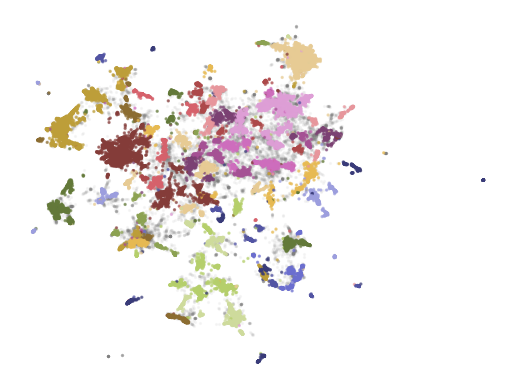

In [24]:
import matplotlib.pyplot as plt

# Plot outliers and non-outliers seperately
plt.scatter(outliers_df.x, outliers_df.y, alpha=0.05, s=2, c="grey")
plt.scatter(
    clusters_df.x, clusters_df.y, c=clusters_df.cluster.astype(int),
    alpha=0.6, s=2, cmap='tab20b'
)
plt.axis('off')

In [25]:
plt.savefig("matplotlib.png", dpi=300)  # Uncomment to save the graph as a .png

<Figure size 640x480 with 0 Axes>

# From Text Clustering to Topic Modeling

What is the differnece between Text Clustering and Topic Modeling?

<details>
	<summary>	Answer by Cluade</summary>
  Certainly! As an expert in LLMs and Hugging Face technologies, I'd be happy to explain the difference between Text Clustering and Topic Modeling. Both are important techniques in natural language processing and text analysis, but they serve different purposes and use different approaches.

Text Clustering:

1. Purpose: Text clustering is about grouping similar documents or texts together based on their content.

2. Approach: It uses similarity measures (like cosine similarity) to group texts that are close to each other in the vector space.

3. Output: The result is a set of clusters, where each cluster contains documents that are similar to each other.

4. Unsupervised: It's an unsupervised learning technique, meaning it doesn't require labeled data.

5. Example use case: Grouping news articles into categories like sports, politics, technology, etc.

6. Hugging Face implementation: You might use sentence-transformers to get embeddings, then apply a clustering algorithm like K-means.

```python
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts)
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(embeddings)
```

Topic Modeling:

1. Purpose: Topic modeling aims to discover abstract topics that occur in a collection of documents.

2. Approach: It looks for patterns of word co-occurrence across documents to identify themes.

3. Output: The result is a set of topics, where each topic is represented by a distribution over words, and each document is represented by a distribution over topics.

4. Unsupervised: Like clustering, it's also an unsupervised technique.

5. Example use case: Discovering the main themes discussed in a large corpus of scientific papers.

6. Hugging Face implementation: You might use the BERTopic library, which leverages BERT embeddings for topic modeling.

```python
from bertopic import BERTopic

topic_model = BERTopic()
topics, _ = topic_model.fit_transform(texts)
```

Key Differences:

1. Focus: Clustering focuses on grouping entire documents, while topic modeling focuses on discovering themes across documents.

2. Granularity: Clustering assigns each document to a single cluster, while topic modeling allows each document to be a mixture of multiple topics.

3. Interpretability: Topic models often provide more interpretable results, as they give you word distributions for each topic.

4. Flexibility: Topic modeling can capture that a document might be about multiple themes, which clustering typically doesn't do.

5. Use cases: Clustering is often used for document organization or search, while topic modeling is used for content analysis or thematic discovery.

In practice, you might use both techniques. For example, you could use topic modeling to discover themes in your corpus, then use clustering to group documents based on their topic distributions.

With Hugging Face's ecosystem, you can leverage powerful pre-trained language models for both tasks, often leading to more semantically meaningful results compared to traditional methods like TF-IDF with K-means for clustering or Latent Dirichlet Allocation (LDA) for topic modeling.
</details>

## **BERTopic: A Modular Topic Modeling Framework**

In [26]:
from bertopic import BERTopic # BERT version specifically for Topic modelling

[Link to official Site](https://maartengr.github.io/BERTopic/index.html)

In [27]:
# Train our model with our previously defined models
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
).fit(abstracts, embeddings)

2024-10-16 13:53:08,261 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-16 13:54:09,184 - BERTopic - Dimensionality - Completed ✓
2024-10-16 13:54:09,186 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-16 13:54:12,557 - BERTopic - Cluster - Completed ✓
2024-10-16 13:54:12,579 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-16 13:54:18,104 - BERTopic - Representation - Completed ✓


Now, let's start exploring the topics that we got by running the code above.

In [28]:
topic_model.get_topic_info()

Topic  Count                                           Name  \
0       -1  13888                               -1_the_of_and_to   
1        0   2266                 0_question_questions_answer_qa   
2        1   2148                   1_speech_asr_recognition_end   
3        2   1501          2_medical_clinical_biomedical_patient   
4        3   1043                 3_translation_nmt_machine_bleu   
..     ...    ...                                            ...   
143    142     55  142_counterfactual_counterfactuals_cad_causal   
144    143     54           143_emoji_emojis_emoticons_sentiment   
145    144     53      144_prompt_prompts_optimization_prompting   
146    145     52                145_mixed_code_sentiment_mixing   
147    146     51   146_diffusion_generation_autoregressive_text   

                                        Representation  \
0    [the, of, and, to, in, we, for, language, that...   
1    [question, questions, answer, qa, answering, a...   
2    [speech, asr, recognition, end, acoustic, spea...   
3    [medical, clinical, biomedical, patient, healt...   
4    [translation, nmt, machine, bleu, neural, engl...   
..                                                 ...   
143  [counterfactual, counterfactuals, cad, causal,...   
144  [emoji, emojis, emoticons, sentiment, twitter,...   
145  [prompt, prompts, optimization, prompting, llm...   
146  [mixed, code, sentiment, mixing, analysis, eng...   
147  [diffusion, generation, autoregressive, text, ...   

                                   Representative_Docs  
0    [  Understanding context is key to understandi...  
1    [  Neural network models recently proposed for...  
2    [  We describe a method to jointly pre-train s...  
3    [  A common practice in the medical industry i...  
4    [  In this paper, we introduce a hybrid search...  
..                                                 ...  
143  [  For text classification tasks, finetuned la...  
144  [  The frequent use of Emojis on social media ...  
145  [  Prompt optimization aims to find the best p...  
146  [  The usage of more than one language in the ...  
147  [  Diffusion models have achieved great succes...  

[148 rows x 5 columns]

Hundreds of topics were generated using the default model! To get the top 10 keywords per topic as well as their c-TF-IDF weights, we can use the `get_topic()` function:

In [29]:
topic_model.get_topic(0)

[('question', 0.021637400575892987),
 ('questions', 0.016266042013288344),
 ('answer', 0.015973519718882438),
 ('qa', 0.015948770268401483),
 ('answering', 0.015063928712626988),
 ('answers', 0.009981543465719056),
 ('retrieval', 0.00936324897726126),
 ('comprehension', 0.0077706581485717),
 ('reading', 0.007173715631069418),
 ('the', 0.00645281722389036)]

We can use the `find_topics()` function to search for specific topics based on a search term. Let’s search for a topic about topic modeling:

In [30]:
topic_model.find_topics("topic modeling")

([19, -1, 2, 28, 37], [0.9542535, 0.91147697, 0.9082159, 0.9078437, 0.9051397])

It returns that topic 22 has a relatively high similarity (0.95) with our search term. If we then inspect the topic, we can see that it is indeed a topic about topic modeling:

`DOUBT:` WHy 22 instead of 21? And why in the next step we use 22 instead of 21? That is `topic_model.find_topics("topic modeling")` returns 0-based indexing but while retrieving( get_topic) we are using the normal indexing like 22 ?

In [31]:
topic_model.get_topic(22)

[('adversarial', 0.06643550767313827),
 ('attacks', 0.033638098122956324),
 ('attack', 0.03264949756644395),
 ('robustness', 0.02238059979899247),
 ('examples', 0.019198707517109014),
 ('perturbations', 0.01265157264800703),
 ('defense', 0.011492580689191467),
 ('perturbation', 0.009496119494756133),
 ('against', 0.009381737968664748),
 ('nlp', 0.009277062422591834)]

That seems like a topic that is, in part, characterized by the classic LDA technique. Let's see if the BERTopic paper was also assigned to topic 22:

In [32]:
topic_model.topics_[titles.index('BERTopic: Neural topic modeling with a class-based TF-IDF procedure')]

19

It is! We expected it might be because there are non-LDA specific words in the topic describtion such as "clustering" and "topic".

### **Visualizations**

**Visualize Documents**

In [33]:
# Visualize topics and documents
fig = topic_model.visualize_documents(
    titles,
    reduced_embeddings=reduced_embeddings,
    width=1200,
    hide_annotations=True
)

# Update fonts of legend for easier visualization
fig.update_layout(font=dict(size=16))

In [34]:
# Visualize barchart with ranked keywords
topic_model.visualize_barchart()

# Visualize relationships between topics
topic_model.visualize_heatmap(n_clusters=30)

# Visualize the potential hierarchical structure of topics
topic_model.visualize_hierarchy()

## **Representation Models**

What is Represtation models? HOw are they differnet from simple Topic modelling using BertTopic? How does representation works under the hood to execute the topic modelling?
<details>
	<summary>	Answer by CHatGPT</summary>
  Representation models in the context of topic modeling are advanced models that capture the meaning of text data in a dense, high-dimensional space, usually using deep learning techniques like transformers. These models aim to create a more nuanced understanding of text, capturing semantic similarities between words or phrases beyond just their surface forms.

### Difference from Simple Topic Modeling (e.g., BERTopic)
1. **Simple Topic Modeling**:
   - Tools like BERTopic combine traditional topic modeling methods like clustering with embeddings (e.g., BERT embeddings).
   - They use pre-trained models (like BERT) to create embeddings of text and then cluster these embeddings into topics.
   - BERTopic typically uses dimensionality reduction methods like UMAP followed by clustering algorithms (e.g., HDBSCAN) to identify groups of similar documents.

2. **Representation Models for Topic Modeling**:
   - Representation models use deeper transformer-based architectures like BERT, GPT, or sentence-transformers to produce text embeddings.
   - They focus on generating representations that capture complex semantic structures of the input text.
   - These models are often fine-tuned on specific tasks or datasets to produce embeddings that better reflect domain-specific information.

### How Representation Models Work in Topic Modeling
Representation models generate dense vector representations (embeddings) for each document or sentence. Here's how they operate under the hood for topic modeling:

1. **Embedding Generation**:
   - The model encodes input text (e.g., a sentence or document) into a fixed-size dense vector. Each element in this vector represents some feature of the input text.
   - For instance, in models like Sentence-BERT (SBERT), input sentences are passed through a BERT-based model, and the resulting embeddings reflect the semantic meaning of each sentence.

2. **Similarity Computation**:
   - These embeddings are then compared using similarity measures like cosine similarity.
   - Documents or sentences that are semantically similar will have closer vector representations in this high-dimensional space.

3. **Clustering**:
   - Once embeddings are generated, clustering algorithms can be applied directly to group similar embeddings into clusters, each representing a topic.
   - The advantage here is that the clusters often represent more coherent and meaningful topics due to the richer representation of the underlying text.

4. **Topic Representation**:
   - Instead of relying solely on word distributions (as in traditional methods like LDA), these models allow topics to be represented by the clusters of similar documents in embedding space.
   - They can better capture nuances, like different meanings of the same word depending on context, which traditional methods might struggle with.

Representation models offer a more nuanced approach to understanding the underlying themes in text data, allowing for more precise and contextually aware topic modeling. Their power lies in their ability to create embeddings that reflect deep semantic relationships between texts.
</details>

<details>
	<summary>Answer by Gemini</summary>
  I'd be glad to explain representation models in topic modeling and how they differ from BertTopic:

**Representation Models in Topic Modeling**

Representation models are a powerful extension to traditional topic modeling techniques like Latent Dirichlet Allocation (LDA) and Non-Negative Matrix Factorization (NMF). These models go beyond simply analyzing word frequencies to capture the deeper semantic relationships between words in a corpus. This allows for more nuanced and interpretable topics.

**Key Concepts:**

- **Embedding Models:** At their core, representation models rely on pre-trained embedding models, such as BERT (Bidirectional Encoder Representations from Transformers) or Sentence Transformers. These models learn to map words or sentences into high-dimensional vector spaces, where words with similar meanings reside close together in the space.
- **Topic Embeddings:** During the topic modeling process, representation models create "topic embeddings" by aggregating the embeddings of words within each topic. These topic embeddings essentially represent the core semantic meaning of the topic.

**How Representation Models Work:**

1. **Preprocessing:** Text data from your corpus undergoes preprocessing steps like cleaning, tokenization, and possibly stemming/lemmatization.
2. **Embedding Extraction:** Each word or sentence in the corpus is converted into its corresponding vector representation using the chosen embedding model.
3. **Topic Modeling:** A clustering algorithm like k-means or hierarchical clustering is then applied to these embeddings. This groups documents with similar word usage patterns (reflected in their embedding distances) into topics.
4. **Topic Representation Refinement** (Optional): Some approaches allow for further refinement of the topic embeddings. This may involve techniques like:
   - **Centroid-based:** Averaging the word embeddings within a topic to obtain a representative embedding.
   - **Keyphrase Extraction:** Using methods like KeyBERT to identify keyphrases within each topic and then embedding those phrases to refine the topic representation.

**Benefits of Representation Models:**

- **Enhanced Topic Quality:** Capture more nuanced semantic relationships, leading to more meaningful topics.
- **Improved Interpretability:** The high-dimensional embeddings can be visualized in reduced dimensions using techniques like t-SNE to visually explore the relationships between topics.
- **Integration with Other Tasks:** These embeddings can be used for downstream tasks like document similarity, document classification, and topic summarization.

**Comparison with BertTopic:**

| Feature               | BertTopic                                         | Representation Models               |
|-----------------------|--------------------------------------------------|-------------------------------------|
| Underlying Technique   | Latent Dirichlet Allocation (LDA)               |  Clustering on word embeddings       |
| Word Relationships     | Limited to co-occurrence frequencies          | Captures semantic relationships        |
| Topic Interpretability | Lower, relies on top words in topic             | Higher, embeddings can be visualized |
| Computational Cost     | Lower                                           | Higher due to embedding generation    |

**In summary, representation models offer a more sophisticated approach to topic modeling by leveraging pre-trained word or sentence embeddings. This leads to richer topic representations and opens up possibilities for further analysis and exploration.**

If you have further questions or want to explore specific representation models for your project, feel free to ask!
</details>

<details>
	<summary>Answer by Cluade</summary>
  Representation models are a powerful approach to topic modeling that differ significantly from simpler methods like BERTopic. Let me break this down for you:

1. Representation Models:
Representation models are deep learning models that learn to encode text into dense vector representations (embeddings) that capture semantic meaning. These include models like BERT, RoBERTa, T5, and others.

Key differences from BERTopic:
- BERTopic uses BERT embeddings as a starting point, but then applies clustering algorithms on top of those embeddings.
- Pure representation models for topic modeling use the embeddings more directly, often with additional fine-tuning or specialized architectures.

2. How Representation Models Work for Topic Modeling:

a) Embedding Generation:
The model encodes each document into a high-dimensional vector space.

b) Dimensionality Reduction:
Often, techniques like UMAP are applied to reduce the dimensionality of these embeddings while preserving semantic relationships.

c) Topic Extraction:
Instead of explicit clustering, representation models might use:
- Attention mechanisms to identify important words/phrases
- Contrastive learning to differentiate between topics
- Autoencoder architectures to learn compact topic representations

d) Fine-tuning:
The model can be fine-tuned on domain-specific data to better capture relevant topics.

3. Advanced Techniques:

Using Hugging Face, you can implement advanced topic modeling with representation models:

```python
from transformers import AutoModel, AutoTokenizer
import torch
from sklearn.cluster import KMeans

# Load pre-trained model
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Encode documents
documents = ["Your list of documents here"]
encodings = tokenizer(documents, padding=True, truncation=True, return_tensors="pt")

# Generate embeddings
with torch.no_grad():
    outputs = model(**encodings)
    embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # Using [CLS] token

# Apply clustering (as a simple example)
kmeans = KMeans(n_clusters=10)
kmeans.fit(embeddings)

# The cluster centers can represent topics
topics = kmeans.cluster_centers_
```

This is a basic example. More advanced methods might involve:

1. Using models like SentenceTransformers for better document-level embeddings.
2. Implementing attention-based topic extraction.
3. Fine-tuning the model on your specific corpus.
4. Using techniques like Latent Dirichlet Allocation (LDA) on top of embeddings.

The key advantage of representation models is their ability to capture complex semantic relationships and contextual information, leading to more nuanced and coherent topics compared to traditional methods.

Would you like me to elaborate on any specific aspect of using representation models for topic modeling?
</details>

**FOLLOW UP QUESITION**

What is the difference between Bert and Sentence transformers if both use the UMAP nad HDBSCAN? How both perform in Topi modelling and Text CLustering?

<details>
  <summary>Answer by ChatGPT</summary>
  BERT and Sentence Transformers (like Sentence-BERT or SBERT) are both powerful tools for generating text embeddings, but they have some key differences in how they generate embeddings and their applications in tasks like topic modeling and text clustering. While both can be used with techniques like UMAP and HDBSCAN for dimensionality reduction and clustering, they serve different roles based on how they process and represent text data. Here's a breakdown:

### Key Differences Between BERT and Sentence Transformers

1. **Embedding Focus**:
   - **BERT**:
     - BERT is mainly designed for token-level tasks like masked language modeling, where the goal is to understand the relationships between words within a sentence.
     - When using BERT for sentence-level embeddings, typically, the `[CLS]` token output or a pooled representation of the tokens is used to represent a whole sentence or document.
     - However, the embeddings from BERT aren’t optimized for producing sentence-level similarity; thus, they often require additional steps (like fine-tuning) to be effective in clustering or similarity-based tasks.

   - **Sentence Transformers (e.g., SBERT)**:
     - Sentence Transformers are specifically designed to generate meaningful sentence-level embeddings.
     - They modify BERT’s architecture by adding a pooling mechanism (e.g., mean pooling) to output a single vector that captures the entire sentence’s meaning.
     - SBERT is often trained using contrastive learning, where pairs of similar and dissimilar sentences are used to teach the model to produce embeddings that are close together in vector space for similar sentences and far apart for dissimilar ones.
     - As a result, SBERT provides embeddings that are more directly suited for measuring semantic similarity between sentences.

2. **Performance in Topic Modeling and Text Clustering**:
   - **BERT**:
     - When used directly for topic modeling or clustering, BERT requires more processing to produce effective sentence embeddings.
     - The embeddings might not naturally cluster well because BERT wasn't designed to output vector representations that reflect sentence-level similarity.
     - The use of UMAP (for dimensionality reduction) and HDBSCAN (for clustering) can help, but the initial embeddings may need further fine-tuning or adjustments to achieve optimal clustering results.
     - BERT can be a good choice if you need to combine sentence embeddings with token-level analysis, but it might require more effort to produce high-quality clusters.

   - **Sentence Transformers**:
     - Sentence Transformers like SBERT excel in topic modeling and text clustering because their embeddings are more semantically meaningful right out of the box.
     - When applying UMAP and HDBSCAN to SBERT embeddings, the results are typically more coherent, with similar sentences or documents clustering together more naturally.
     - The pre-trained models are often ready for tasks that rely on sentence similarity, which can make them faster and more effective for topic modeling.
     - SBERT's embeddings often result in better-defined topics, as the model can capture fine-grained differences between sentences, leading to more accurate clustering.

### UMAP and HDBSCAN in Both Models

- **UMAP (Uniform Manifold Approximation and Projection)**:
  - Both BERT and Sentence Transformers can produce high-dimensional embeddings. UMAP is often used to reduce the dimensionality of these embeddings, making them easier to cluster and visualize.
  - The quality of UMAP's output depends heavily on the quality of the input embeddings. Because SBERT provides better sentence-level embeddings, UMAP's output is often more meaningful when using SBERT compared to raw BERT embeddings.

- **HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)**:
  - HDBSCAN is a clustering algorithm that can handle clusters of varying densities and does not require a predefined number of clusters, making it suitable for the kind of embeddings produced by both BERT and SBERT.
  - With SBERT embeddings, HDBSCAN typically identifies more well-defined clusters due to the better separation of semantically similar sentences.
  - When using BERT embeddings, the clusters might be less coherent unless fine-tuning has been performed to better align BERT’s output with the clustering objective.

### Summary
- **BERT** provides powerful token-level understanding but requires additional steps to adapt it for tasks like topic modeling and clustering.
- **Sentence Transformers** like SBERT are designed specifically for generating semantically meaningful sentence embeddings, making them better suited for tasks involving sentence similarity, topic modeling, and clustering.
- **UMAP** and **HDBSCAN** can be applied to both, but they generally produce better results when working with the embeddings from Sentence Transformers due to their inherent design for capturing semantic relationships between sentences.
</details>

<details>
	<summary>Answer by Claude</summary>
  Excellent question! Let's dive into the differences between BERT and Sentence Transformers for topic modeling and text clustering, especially when both use UMAP and HDBSCAN.

1. BERT vs. Sentence Transformers:

BERT (Bidirectional Encoder Representations from Transformers):
- Designed for contextual word embeddings
- Outputs embeddings for each token in a sequence
- Max sequence length of 512 tokens
- Not optimized for sentence-level or document-level representations

Sentence Transformers:
- Built on top of models like BERT, RoBERTa, or DistilBERT
- Specifically designed to produce semantically meaningful sentence embeddings
- Can handle longer texts by intelligent truncation or pooling strategies
- Often fine-tuned on tasks like natural language inference or semantic textual similarity

2. Performance in Topic Modeling and Text Clustering:

When using UMAP and HDBSCAN, both BERT and Sentence Transformers can be effective, but Sentence Transformers often perform better. Here's why:

a) Document Representation:
- BERT: You typically use the [CLS] token or average token embeddings, which may not capture the full document semantics effectively.
- Sentence Transformers: Directly outputs a single vector for the entire sentence or document, better capturing overall meaning.

b) Handling Long Documents:
- BERT: Limited to 512 tokens, may lose information in longer documents.
- Sentence Transformers: Can handle longer texts more effectively through various pooling strategies.

c) Semantic Similarity:
- BERT: Good at capturing contextual information, but not optimized for sentence-level similarity.
- Sentence Transformers: Specifically trained to capture sentence-level semantic similarity, which is crucial for clustering and topic modeling.

3. Implementation Comparison:

Let's compare basic implementations using Hugging Face:

BERT:

```python
from transformers import AutoModel, AutoTokenizer
import torch
import numpy as np
from umap import UMAP
from hdbscan import HDBSCAN

# Load BERT
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Function to get embeddings
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].numpy()  # [CLS] token

# Get embeddings for your documents
documents = ["Your list of documents here"]
embeddings = np.vstack([get_bert_embedding(doc) for doc in documents])

# Apply UMAP and HDBSCAN
umap_embeddings = UMAP(n_neighbors=15, n_components=5, metric='cosine').fit_transform(embeddings)
cluster = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom').fit(umap_embeddings)
```

Sentence Transformers:

```python
from sentence_transformers import SentenceTransformer
import numpy as np
from umap import UMAP
from hdbscan import HDBSCAN

# Load Sentence Transformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# Get embeddings for your documents
documents = ["Your list of documents here"]
embeddings = model.encode(documents)

# Apply UMAP and HDBSCAN
umap_embeddings = UMAP(n_neighbors=15, n_components=5, metric='cosine').fit_transform(embeddings)
cluster = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom').fit(umap_embeddings)
```

4. Performance Comparison:

- Accuracy: Sentence Transformers often produce more coherent clusters and topics due to better sentence-level representations.
- Speed: Sentence Transformers can be faster, especially for longer documents, as they don't need to process each token individually.
- Interpretability: Both methods can be challenging to interpret, but Sentence Transformers' direct document embeddings might be more intuitive.

In practice, Sentence Transformers are often preferred for topic modeling and text clustering tasks due to their optimized sentence-level representations. However, the best choice depends on your specific use case, dataset, and computational resources.

Would you like me to elaborate on any specific aspect of this comparison or provide a more detailed code example for a particular task?
</details>

In these examples that follow, we will update our topic representations **after** having trained our model. This allows for quick iteration. If, however, you want to use a representation model at the start of training, you will need to run it as follows:

```python
from bertopic.representation import KeyBERTInspired
from bertopic import BERTopic

# Create your representation model
representation_model = KeyBERTInspired()

# Use the representation model in BERTopic on top of the default pipeline
topic_model = BERTopic(representation_model=representation_model)
```

To use the representation models, we are first going to duplicate our topic model such that easily show the differences between a model with and without representation model.

In [35]:
# Save original representations
from copy import deepcopy
original_topics = deepcopy(topic_model.topic_representations_)

In [36]:
def topic_differences(model, original_topics, nr_topics=5):
    """Show the differences in topic representations between two models """
    df = pd.DataFrame(columns=["Topic", "Original", "Updated"])
    for topic in range(nr_topics):

        # Extract top 5 words per topic per model
        og_words = " | ".join(list(zip(*original_topics[topic]))[0][:5])
        new_words = " | ".join(list(zip(*model.get_topic(topic)))[0][:5])
        df.loc[len(df)] = [topic, og_words, new_words]

    return df

### KeyBERTInspired

In [37]:
from bertopic.representation import KeyBERTInspired

# Update our topic representations using KeyBERTInspired
representation_model = KeyBERTInspired()
topic_model.update_topics(abstracts, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0     question | questions | answer | qa | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2  medical | clinical | biomedical | patient | he...   
3      3        translation | nmt | machine | bleu | neural   
4      4  summarization | summaries | summary | abstract...   

                                             Updated  
0  answering | questions | answer | comprehension...  
1  phonetic | speech | encoder | language | trans...  
2               nlp | clinical | ehr | ehrs | corpus  
3  translation | translate | translated | transla...  
4  summarization | summarizers | summaries | summ...

### Maximal Marginal Relevance

What is Maximal Marginal Relevance models? How are they different from simple Topic modelling using BertTopic and KetBERTINpsired ?  
How does Maximal Marginal Relevance work under the hood?
<details>
	<summary>Answer by ChatGPT </summary>
  Maximal Marginal Relevance (MMR) is a technique used in the context of information retrieval, summarization, and topic modeling to ensure diversity and relevance when selecting results from a set of documents or generated outputs. MMR aims to balance two objectives: **maximizing relevance** to the user's query and **minimizing redundancy** among the selected results. This makes it useful for scenarios like building diverse summaries or generating a representative set of topics in a dataset.

### Difference Between MMR Models and Simple Topic Modeling (e.g., BERTopic, KeyBERT-Inspired)

1. **Focus on Diversity and Relevance**:
   - **BERTopic**:
     - BERTopic is a topic modeling technique that clusters documents based on their semantic similarity, using embeddings and clustering algorithms like UMAP and HDBSCAN.
     - It focuses on creating groups of similar documents and then identifying themes (topics) that best describe each group.
     - The approach is mainly clustering-based and does not explicitly focus on selecting diverse or non-redundant results.
   
   - **KeyBERT-Inspired Models**:
     - KeyBERT-inspired methods use BERT embeddings to extract keywords that are most representative of a given document.
     - These methods aim to identify important keywords or phrases but do not inherently balance relevance and diversity.
     - Like BERTopic, they focus more on identifying key terms or themes from the data but without the emphasis on controlling redundancy among results.

   - **MMR-Based Models**:
     - MMR specifically aims to **avoid redundancy** while maintaining high relevance, which is particularly important when selecting representative subsets from a larger corpus.
     - For example, when generating a summary or selecting the most representative documents for a topic, MMR ensures that selected items cover diverse aspects of the data, not just the most frequently occurring ones.
     - This makes MMR-based approaches particularly useful in situations where it's important to cover different perspectives or aspects of a topic, not just the most common or similar elements.

2. **Selection Mechanism**:
   - **BERTopic/KeyBERT**:
     - These models use embeddings and clustering for topic discovery and rely on similarity measures to group or extract key terms.
     - They do not inherently have a mechanism to penalize redundancy or ensure diversity in selected results.
   
   - **MMR**:
     - MMR involves an iterative selection process that explicitly evaluates the trade-off between similarity to a query and dissimilarity to already selected items.
     - It selects items (e.g., sentences, documents, topics) that are not only relevant to the user's query but also offer new information that has not yet been covered by previously selected items.

### How Maximal Marginal Relevance Works Under the Hood

MMR operates based on a formula that balances relevance and redundancy. Here's a step-by-step explanation of how it functions:

1. **Calculate Relevance and Redundancy Scores**:
   - MMR starts with a set of items (e.g., sentences, documents) that need to be ranked or selected.
   - For each candidate item, it computes a **relevance score** with respect to the user query or a central topic. This can be done using similarity measures like cosine similarity between query and item embeddings (e.g., from BERT or other representation models).
   - Simultaneously, it computes a **redundancy score** between each candidate item and those already selected, which measures how similar a candidate is to the items that have already been included in the final set.

2. **Iterative Selection Process**:
   - MMR uses a parameter **λ** (lambda) to balance relevance and diversity:
     - **λ = 1**: The selection would be based purely on relevance.
     - **λ = 0**: The selection would focus entirely on minimizing redundancy, which means it would favor items that are very different from those already selected.
     - Typical values for **λ** lie between 0.5 and 0.7 to balance both aspects.
   - For each iteration, the MMR algorithm selects the item that maximizes the following formula:
     \[
     \text{MMR}(d_i) = \lambda \times \text{Sim}(d_i, q) - (1 - \lambda) \times \max_{d_j \in S} \text{Sim}(d_i, d_j)
     \]
     - \( \text{Sim}(d_i, q) \): The similarity between the candidate item \( d_i \) and the query \( q \).
     - \( \max_{d_j \in S} \text{Sim}(d_i, d_j) \): The maximum similarity between the candidate item \( d_i \) and the items \( d_j \) already selected in the set \( S \).

3. **Select Diverse Yet Relevant Items**:
   - The item that achieves the highest MMR score in each iteration is added to the selected set \( S \).
   - The algorithm continues iterating until a specified number of items are selected or a certain threshold of relevance is reached.

4. **Output**:
   - The result is a set of selected items that are both relevant to the user's needs (or central topic) and diverse in terms of the information they provide.
   - In topic modeling, this can result in a more comprehensive set of topics that span various aspects of the text corpus.

### Summary

- **MMR** focuses on selecting items that are both relevant and diverse, making it suitable for scenarios where reducing redundancy is crucial.
- **BERTopic** and **KeyBERT-inspired models** are more focused on clustering and extracting keywords or phrases based on semantic similarity, without explicitly addressing the trade-off between relevance and diversity.
- MMR operates through an iterative process using a similarity-based formula that balances relevance to the query with dissimilarity to previously selected items, ensuring a varied and informative output set.
</details>

<details>
	<summary>Answer by CLuade</summary>
  Maximal Marginal Relevance (MMR) is an advanced technique used in information retrieval and text summarization, which can be applied to topic modeling as well. Let's dive into how it works and how it differs from BERTopic and KeyBERT-inspired approaches.

1. Maximal Marginal Relevance (MMR):

MMR is a method to reduce redundancy while maintaining relevance in selected sentences or topics. It aims to maximize the diversity of results while still ensuring their relevance to the query or document.

Key Concept:
MMR selects items that maximize a trade-off between relevance to the query and diversity compared to already selected items.

2. Differences from BERTopic and KeyBERT-inspired approaches:

- BERTopic: Uses BERT embeddings and clustering to identify topics.
- KeyBERT: Extracts keywords based on similarity to document embeddings.
- MMR: Focuses on balancing relevance and diversity in topic or keyword selection.

3. How MMR works under the hood:

The MMR algorithm works as follows:

1. Start with a set of candidate items (e.g., sentences, topics, keywords).
2. Select the most relevant item.
3. For each subsequent selection:
   a. Calculate the relevance of each remaining item to the query/document.
   b. Calculate the similarity of each item to already selected items.
   c. Choose the item that maximizes the MMR score:
      MMR = λ * (relevance to query) - (1 - λ) * (max similarity to selected items)
   Where λ is a parameter between 0 and 1 that balances relevance and diversity.

4. Implementation using Hugging Face:

Here's an example of how you might implement MMR for topic modeling using Hugging Face transformers:

```python
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class MMRTopicModeling:
    def __init__(self, model_name='bert-base-uncased', lambda_param=0.5):
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModel.from_pretrained(model_name)
        self.lambda_param = lambda_param

    def get_embeddings(self, texts):
        inputs = self.tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            outputs = self.model(**inputs)
        return outputs.last_hidden_state[:, 0, :].numpy()  # Using [CLS] token

    def mmr(self, doc_embedding, word_embeddings, words, top_n, diversity):
        word_doc_similarity = cosine_similarity(word_embeddings, doc_embedding)
        word_similarity = cosine_similarity(word_embeddings)
        
        keywords_idx = [np.argmax(word_doc_similarity)]
        candidates_idx = [i for i in range(len(words)) if i != keywords_idx[0]]
        
        for _ in range(top_n - 1):
            candidate_similarities = word_doc_similarity[candidates_idx, :]
            target_similarities = np.max(word_similarity[candidates_idx][:, keywords_idx], axis=1)
            
            mmr = (1-diversity) * candidate_similarities - diversity * target_similarities.reshape(-1, 1)
            mmr_idx = candidates_idx[np.argmax(mmr)]
            
            keywords_idx.append(mmr_idx)
            candidates_idx.remove(mmr_idx)
        
        return [words[idx] for idx in keywords_idx]

    def extract_topics(self, document, n_topics=5):
        doc_embedding = self.get_embeddings([document])
        words = document.split()
        word_embeddings = self.get_embeddings(words)
        
        topics = self.mmr(doc_embedding, word_embeddings, words, n_topics, self.lambda_param)
        return topics

# Usage
mmr_model = MMRTopicModeling()
document = "Your long document text here..."
topics = mmr_model.extract_topics(document)
print(f"Extracted topics: {topics}")
```

This implementation uses BERT embeddings, but you can easily swap it for other models from Hugging Face.

5. Advantages of MMR for Topic Modeling:

- Reduces redundancy in topics
- Balances between relevance and diversity
- Can capture more nuanced topics that might be missed by clustering-based approaches

6. Considerations:

- The choice of λ (lambda_param) significantly affects the balance between relevance and diversity
- Computationally more intensive than simple clustering approaches
- May require fine-tuning for optimal performance on specific datasets

MMR provides a sophisticated approach to topic modeling that can capture more diverse and representative topics compared to simpler methods. It's particularly useful when you want to ensure a broad coverage of themes within a document or corpus while maintaining relevance.

Would you like me to elaborate on any specific part of the MMR approach or provide a comparison with other advanced topic modeling techniques?
</details>

In [38]:
from bertopic.representation import MaximalMarginalRelevance

# Update our topic representations to MaximalMarginalRelevance
representation_model = MaximalMarginalRelevance(diversity=0.5)
topic_model.update_topics(abstracts, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0     question | questions | answer | qa | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2  medical | clinical | biomedical | patient | he...   
3      3        translation | nmt | machine | bleu | neural   
4      4  summarization | summaries | summary | abstract...   

                                             Updated  
0  questions | retrieval | comprehension | knowle...  
1                 speech | asr | wer | error | model  
2  clinical | biomedical | patient | healthcare |...  
3       translation | nmt | bleu | neural | parallel  
4  summarization | extractive | rouge | factual |...

## Text Generation



### Flan-T5

In [39]:
from transformers import pipeline
from bertopic.representation import TextGeneration


In [40]:
prompt = """I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: '[KEYWORDS]'.

Based on the documents and keywords, what is this topic about?"""


In [41]:

# Update our topic representations using Flan-T5
generator = pipeline('text2text-generation', model='google/flan-t5-small')
representation_model = TextGeneration(
    generator, prompt=prompt, doc_length=50, tokenizer="whitespace"
)

# Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
# using device=cuda in the above code to run the code faster

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [42]:
topic_model.update_topics(abstracts, representation_model=representation_model)


100%|██████████| 148/148 [01:00<00:00,  2.45it/s]


In [44]:
# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0     question | questions | answer | qa | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2  medical | clinical | biomedical | patient | he...   
3      3        translation | nmt | machine | bleu | neural   
4      4  summarization | summaries | summary | abstract...   

                                  Updated  
0          Question Answering |  |  |  |   
1          Speech recognition |  |  |  |   
2                Science/Tech |  |  |  |   
3  Neural Machine Translation |  |  |  |   
4               Summarization |  |  |  |

### OpenAI

In [ ]:
import openai
from bertopic.representation import OpenAI

prompt = """
I have a topic that contains the following documents:
[DOCUMENTS]

The topic is described by the following keywords: [KEYWORDS]

Based on the information above, extract a short topic label in the following format:
topic: <short topic label>
"""

# Update our topic representations using GPT-3.5
client = openai.OpenAI(api_key="YOUR_KEY_HERE")
representation_model = OpenAI(
    client, model="gpt-3.5-turbo", exponential_backoff=True, chat=True, prompt=prompt
)
topic_model.update_topics(abstracts, representation_model=representation_model)

# Show topic differences
topic_differences(topic_model, original_topics)

100%|██████████| 156/156 [02:13<00:00,  1.17it/s]


Topic                                           Original  \
0      0        speech | asr | recognition | end | acoustic   
1      1  medical | clinical | biomedical | patient | he...   
2      2  sentiment | aspect | analysis | reviews | opinion   
3      3        translation | nmt | machine | neural | bleu   
4      4  summarization | summaries | summary | abstract...   

                                             Updated  
0  Leveraging External Data for Improving Low-Res...  
1  Improved Representation Learning for Biomedica...  
2  "Advancements in Aspect-Based Sentiment Analys...  
3            Neural Machine Translation Enhancements  
4                  Document Summarization Techniques

In [45]:
topic_model

In [47]:
titles[:5]

['Introduction to Arabic Speech Recognition Using CMUSphinx System',
 'Arabic Speech Recognition System using CMU-Sphinx4',
 'On the Development of Text Input Method - Lessons Learned',
 'Network statistics on early English Syntax: Structural criteria',
 'Segmentation and Context of Literary and Musical Sequences']

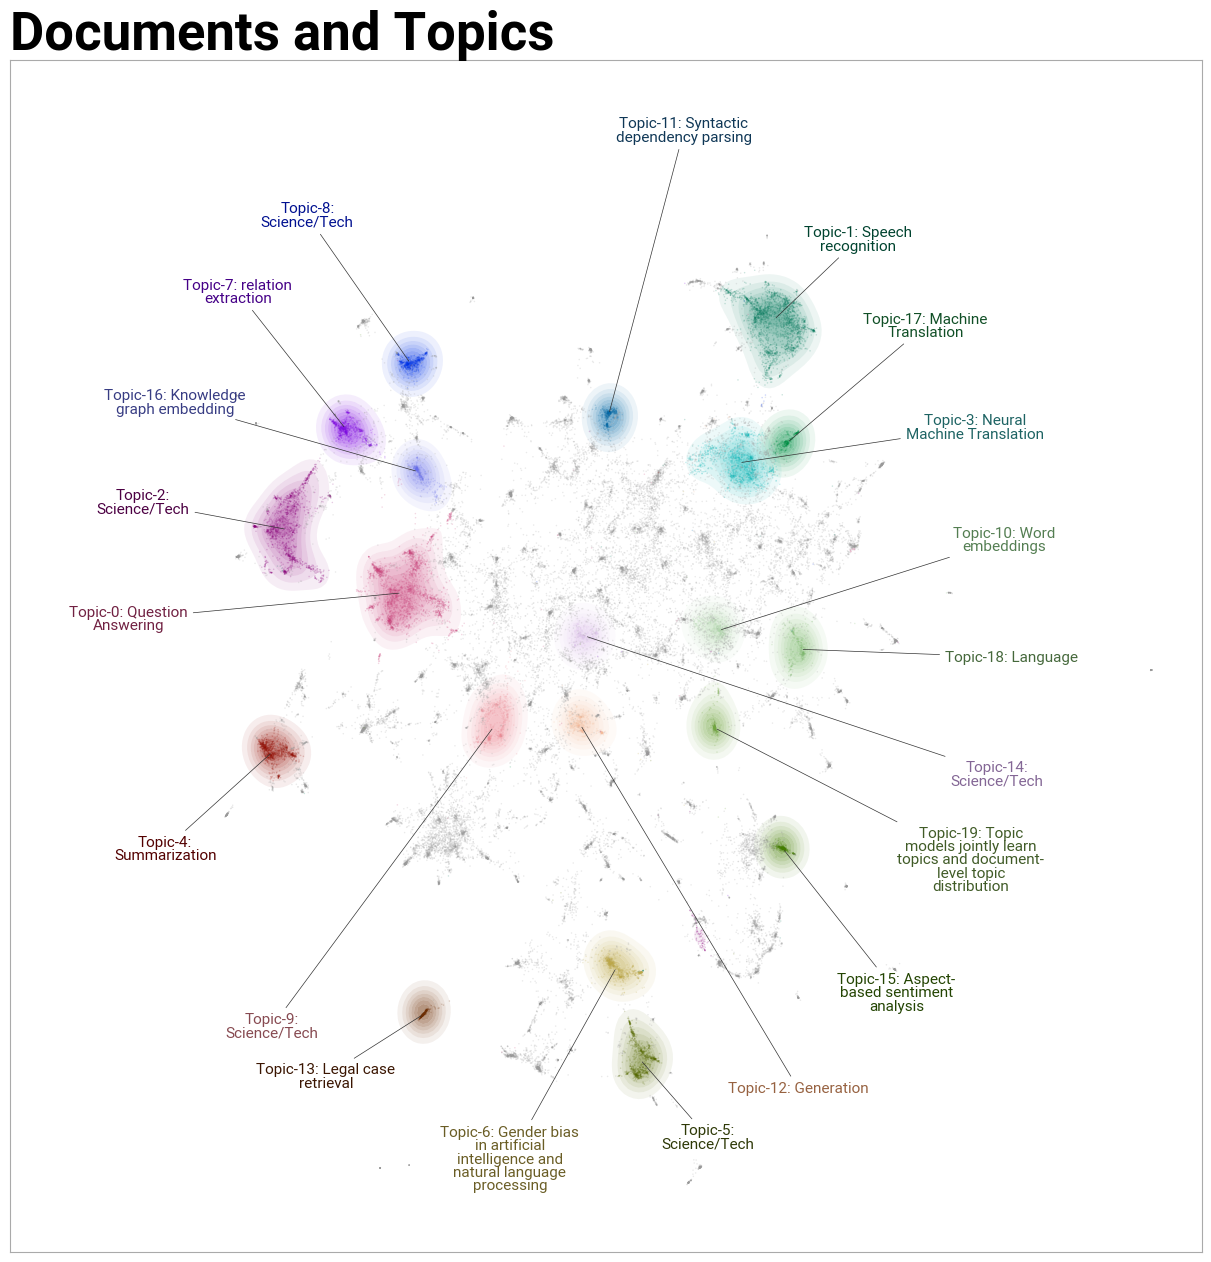

In [48]:
# Visualize topics and documents
fig = topic_model.visualize_document_datamap(
    titles,
    topics=list(range(20)),
    reduced_embeddings=reduced_embeddings,
    width=1200,
    label_font_size=11,
    label_wrap_width=20,
    use_medoids=True,
)
plt.savefig("datamapplot.png", dpi=300)


## **BONUS**: Word Cloud

Make sure to pip install `wordcloud` first in order to follow this bonus:


In [49]:
!pip install wordcloud

First, we need to make sure that each topic is described by a bit more words than just 10 as that would make for a much more interesting wordcloud.

In [50]:
topic_model.update_topics(abstracts, top_n_words=500)

2024-10-16 14:29:35,521 - BERTopic - WARNING: Note that extracting more than 100 words from a sparse can slow down computation quite a bit.


THe above code takes too much time ( almost 2 mins ). Udnerstnad how to make it faster.

Then, we can run the following code to generate the wordcloud for our topic modeling topic:

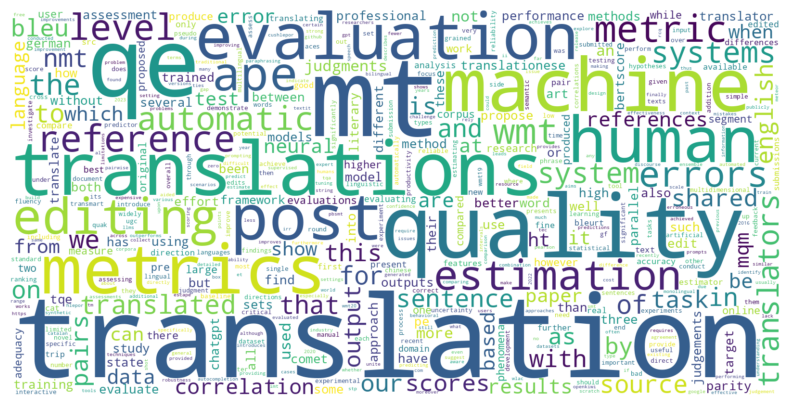

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    plt.figure(figsize=(10,5))
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000, width=1600, height=800)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=17)